# Set up

In [60]:
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [61]:
large_font = 20
medium_font = 15
small_font = 10 

# Create dosage dataframe

In [5]:
dosage_dfs = []
for file in glob.glob("reference_data/dosage_df/2022_09_29_1kg_exome_dosage_dfs/*.csv"):
    sample = os.path.basename(file)
    dosage_df = pd.read_csv(file)
    dosage_df["sample"] = sample.split(".")[0]
    dosage_dfs.append(dosage_df)
combined_dosage_df = pd.concat(dosage_dfs,ignore_index=True)
combined_dosage_df

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143
...,...,...,...,...,...,...,...,...,...
14933301,chr22_50679152_T_C,1,1.011,0.489719,0.343051,0.489719,0.964,0/1,BC_P_004
14933302,chr22_50683332_C_T,1,1.015,0.007315,0.008986,0.007315,0.758,0/1,BC_P_004
14933303,chr22_50695090_G_A,1,1.000,0.484100,0.344249,0.484100,0.961,0/1,BC_P_004
14933304,chr22_50698821_T_C,2,2.000,0.767894,0.767772,0.232106,0.983,1/1,BC_P_004


In [6]:
## Exclude those not in final analysis cohort
integrated_df = pd.read_csv("intergrated_data.csv")
ids_to_keep = integrated_df[integrated_df["Group_Final"]=="Case"]["ID"]

combined_dosage_df = combined_dosage_df[combined_dosage_df["sample"].isin(ids_to_keep)].copy()
combined_dosage_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,35,36,37,38,39,40,43,44,45,46,47,48,51,52,53,54,55,56,57,59,60,61,62,63,64,69,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,156,157,158,159,160,161,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143
...,...,...,...,...,...,...,...,...,...
14933301,chr22_50679152_T_C,1,1.011,0.489719,0.343051,0.489719,0.964,0/1,BC_P_004
14933302,chr22_50683332_C_T,1,1.015,0.007315,0.008986,0.007315,0.758,0/1,BC_P_004
14933303,chr22_50695090_G_A,1,1.000,0.484100,0.344249,0.484100,0.961,0/1,BC_P_004
14933304,chr22_50698821_T_C,2,2.000,0.767894,0.767772,0.232106,0.983,1/1,BC_P_004


In [7]:
gt_dosages = []
for gt in combined_dosage_df["GT"]:
    gt_dosage = 0
    if gt == gt:
        gt_split = gt.split("/")
        gt_dosage = int(gt_split[0]) + int(gt_split[1])
    gt_dosages.append(gt_dosage)
combined_dosage_df["GT_dosage"] = gt_dosages
combined_dosage_df

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143,2
...,...,...,...,...,...,...,...,...,...,...
14933301,chr22_50679152_T_C,1,1.011,0.489719,0.343051,0.489719,0.964,0/1,BC_P_004,1
14933302,chr22_50683332_C_T,1,1.015,0.007315,0.008986,0.007315,0.758,0/1,BC_P_004,1
14933303,chr22_50695090_G_A,1,1.000,0.484100,0.344249,0.484100,0.961,0/1,BC_P_004,1
14933304,chr22_50698821_T_C,2,2.000,0.767894,0.767772,0.232106,0.983,1/1,BC_P_004,2


In [8]:
## Calculate cohort level AF by DS_wes

combined_dosage_df_agg = combined_dosage_df.groupby("ID").agg({"DS_wes":"sum"})
combined_dosage_df_agg["DS_wes_total_alleles"] = 2*combined_dosage_df["sample"].nunique()
combined_dosage_df_agg["DS_wes_cohort_AF"] = combined_dosage_df_agg["DS_wes"] / combined_dosage_df_agg["DS_wes_total_alleles"]
combined_dosage_df_agg["DS_wes_cohort_MAF"] = np.minimum(combined_dosage_df_agg["DS_wes_cohort_AF"],1-combined_dosage_df_agg["DS_wes_cohort_AF"])
combined_dosage_df_agg = combined_dosage_df_agg.reset_index()
combined_dosage_df_agg


,ID,DS_wes,DS_wes_total_alleles,DS_wes_cohort_AF,DS_wes_cohort_MAF
0,chr10_100042338_T_C,15,430,0.034884,0.034884
1,chr10_100042505_G_A,29,430,0.067442,0.067442
2,chr10_100042655_G_A,1,430,0.002326,0.002326
3,chr10_100048726_T_C,3,430,0.006977,0.006977
4,chr10_100048785_C_A,2,430,0.004651,0.004651
...,...,...,...,...,...
613103,chrY_5098912_G_T,2,430,0.004651,0.004651
613104,chrY_5098933_A_C,1,430,0.002326,0.002326
613105,chrY_5099707_A_C,2,430,0.004651,0.004651
613106,chrY_5100547_T_C,2,430,0.004651,0.004651


In [14]:
vep_coords = [item.split("_") for item in combined_dosage_df_agg["ID"]]
vep_coord_cols = ["CHROM","POS","REF","ALT"]
vep_coords_df = pd.DataFrame(data=vep_coords,columns=vep_coord_cols)
combined_dosage_df_agg_combined = pd.concat([combined_dosage_df_agg,vep_coords_df],axis=1)
combined_dosage_df_agg_combined

,ID,DS_wes,DS_wes_total_alleles,DS_wes_cohort_AF,DS_wes_cohort_MAF,CHROM,POS,REF,ALT
0,chr10_100042338_T_C,15,430,0.034884,0.034884,chr10,100042338,T,C
1,chr10_100042505_G_A,29,430,0.067442,0.067442,chr10,100042505,G,A
2,chr10_100042655_G_A,1,430,0.002326,0.002326,chr10,100042655,G,A
3,chr10_100048726_T_C,3,430,0.006977,0.006977,chr10,100048726,T,C
4,chr10_100048785_C_A,2,430,0.004651,0.004651,chr10,100048785,C,A
...,...,...,...,...,...,...,...,...,...
613103,chrY_5098912_G_T,2,430,0.004651,0.004651,chrY,5098912,G,T
613104,chrY_5098933_A_C,1,430,0.002326,0.002326,chrY,5098933,A,C
613105,chrY_5099707_A_C,2,430,0.004651,0.004651,chrY,5099707,A,C
613106,chrY_5100547_T_C,2,430,0.004651,0.004651,chrY,5100547,T,C


In [ ]:
## Add VEP Information

In [9]:
vep_table_df = pd.read_csv("reference_data/vep_annotated/vep_imputed_few_transcripts.txt",sep="\t")
vep_table_df = vep_table_df.drop(columns="AF")
vep_table_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#Uploaded_variation,Location,Allele,Consequence,IMPACT,SYMBOL,Gene,Feature_type,Feature,BIOTYPE,...,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,TRANSCRIPTION_FACTORS
0,chr1_69063_T_C,1:69063-69063,C,synonymous_variant,LOW,OR4F5,ENSG00000186092,Transcript,ENST00000641515.2,protein_coding,...,0.1089,-,-,-,-,-,-,-,-,-
1,chr1_69270_A_G,1:69270-69270,G,synonymous_variant,LOW,OR4F5,ENSG00000186092,Transcript,ENST00000641515.2,protein_coding,...,0.8855,-,"0,1","0,1",-,-,-,-,-,-
2,chr1_69284_C_G,1:69284-69284,G,missense_variant,MODERATE,OR4F5,ENSG00000186092,Transcript,ENST00000641515.2,protein_coding,...,-,-,-,-,-,-,-,-,-,-
3,chr1_69428_T_G,1:69428-69428,G,missense_variant,MODERATE,OR4F5,ENSG00000186092,Transcript,ENST00000641515.2,protein_coding,...,0.001296,-,-,-,-,-,-,-,-,-
4,chr1_69511_A_G,1:69511-69511,G,missense_variant,MODERATE,OR4F5,ENSG00000186092,Transcript,ENST00000641515.2,protein_coding,...,0.9772,-,"0,1","0,1",-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613103,chrY_5501345_T_A,Y:5501345-5501345,A,intron_variant,MODIFIER,PCDH11Y,ENSG00000099715,Transcript,ENST00000698851.1,protein_coding,...,-,-,-,-,-,-,-,-,-,-
613104,chrY_14840455_T_C,Y:14840455-14840455,C,synonymous_variant,LOW,NLGN4Y,ENSG00000165246,Transcript,ENST00000684976.1,protein_coding,...,0,-,"0,1","0,1",-,-,-,-,-,-
613105,chrY_14840467_T_C,Y:14840467-14840467,C,synonymous_variant,LOW,NLGN4Y,ENSG00000165246,Transcript,ENST00000684976.1,protein_coding,...,-,-,"0,1","0,1",-,-,-,-,-,-
613106,chrY_14840785_C_T,Y:14840785-14840785,T,synonymous_variant,LOW,NLGN4Y,ENSG00000165246,Transcript,ENST00000684976.1,protein_coding,...,-,likely_benign,"0,1","1,1",-,-,-,-,-,-


In [10]:
vep_af_cols = [col for col in vep_table_df.columns if "_AF" in col]
vep_df_subset = vep_table_df[["#Uploaded_variation","SYMBOL"] + vep_af_cols].drop_duplicates(subset="#Uploaded_variation").copy()
vep_df_subset


,#Uploaded_variation,SYMBOL,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,gnomADe_AF,gnomADe_AFR_AF,gnomADe_AMR_AF,...,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF
0,chr1_69063_T_C,OR4F5,-,-,-,-,-,-,-,-,...,0.04058,0.02941,0.04766,0.04545,0.06778,0.0303,0.1538,0.06103,0.05789,0.1089
1,chr1_69270_A_G,OR4F5,-,-,-,-,-,0.838,0.3591,0.7932,...,0.3544,0.8158,0.6945,0.8033,0.9961,0.9294,0.7857,0.8798,0.6087,0.8855
2,chr1_69284_C_G,OR4F5,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,chr1_69428_T_G,OR4F5,0.0015,0.036,0.003,0.0497,0.0153,0.02454,0.003348,0.009059,...,0.001407,0,0.001413,0.003715,0,0.006526,0,0.01105,0.005376,0.001296
4,chr1_69511_A_G,OR4F5,-,-,-,-,-,0.9497,0.6075,0.9514,...,0.5948,0.998,0.8951,0.9784,0.9998,0.9907,0.9,0.9674,0.8624,0.9772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613103,chrY_5501345_T_A,PCDH11Y,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
613104,chrY_14840455_T_C,NLGN4Y,-,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,7.469e-05,0,0
613105,chrY_14840467_T_C,NLGN4Y,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
613106,chrY_14840785_C_T,NLGN4Y,-,-,-,-,-,3.139e-05,0,0.0001447,...,-,-,-,-,-,-,-,-,-,-


In [15]:
combined_dosage_df_agg_combined = combined_dosage_df_agg_combined.merge(vep_df_subset,left_on="ID",right_on="#Uploaded_variation",how="left")
combined_dosage_df_agg_combined


,ID,DS_wes,DS_wes_total_alleles,DS_wes_cohort_AF,DS_wes_cohort_MAF,CHROM,POS,REF,ALT,#Uploaded_variation,...,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF
0,chr10_100042338_T_C,15,430,0.034884,0.034884,chr10,100042338,T,C,chr10_100042338_T_C,...,0.0005065,0,0.005569,0.07287,0,0.0004709,0.05063,0.003101,0.007648,0.00518
1,chr10_100042505_G_A,29,430,0.067442,0.067442,chr10,100042505,G,A,chr10_100042505_G_A,...,0.007333,0.006593,0.04731,0.03028,0.02386,0.04019,0.03822,0.03724,0.04019,0.01327
2,chr10_100042655_G_A,1,430,0.002326,0.002326,chr10,100042655,G,A,chr10_100042655_G_A,...,0,0,6.563e-05,0,0,0,0,5.879e-05,0,0.0006219
3,chr10_100048726_T_C,3,430,0.006977,0.006977,chr10,100048726,T,C,chr10_100048726_T_C,...,0.05086,0,0.005772,0,0,0,0,5.881e-05,0.008142,0
4,chr10_100048785_C_A,2,430,0.004651,0.004651,chr10,100048785,C,A,chr10_100048785_C_A,...,0.02382,0,0.003666,0.000288,0,0,0,0.0001617,0.008604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613103,chrY_5098912_G_T,2,430,0.004651,0.004651,chrY,5098912,G,T,chrY_5098912_G_T,...,-,-,-,-,-,-,-,-,-,-
613104,chrY_5098933_A_C,1,430,0.002326,0.002326,chrY,5098933,A,C,chrY_5098933_A_C,...,-,-,-,-,-,-,-,-,-,-
613105,chrY_5099707_A_C,2,430,0.004651,0.004651,chrY,5099707,A,C,chrY_5099707_A_C,...,-,-,-,-,-,-,-,-,-,-
613106,chrY_5100547_T_C,2,430,0.004651,0.004651,chrY,5100547,T,C,chrY_5100547_T_C,...,-,-,-,-,-,-,-,-,-,-


In [16]:
## Filter out 0 calls in WES and 0 calls in WGS
combined_dosage_df_filtered = combined_dosage_df[
    ~((combined_dosage_df["DS_wes"]==0)&(combined_dosage_df["GT_dosage"]==0))
]
combined_dosage_df_filtered.copy()

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143,2
...,...,...,...,...,...,...,...,...,...,...
14933301,chr22_50679152_T_C,1,1.011,0.489719,0.343051,0.489719,0.964,0/1,BC_P_004,1
14933302,chr22_50683332_C_T,1,1.015,0.007315,0.008986,0.007315,0.758,0/1,BC_P_004,1
14933303,chr22_50695090_G_A,1,1.000,0.484100,0.344249,0.484100,0.961,0/1,BC_P_004,1
14933304,chr22_50698821_T_C,2,2.000,0.767894,0.767772,0.232106,0.983,1/1,BC_P_004,2


In [17]:
combined_dosage_df_filtered_merged = combined_dosage_df_filtered.merge(
    combined_dosage_df_agg_combined.rename(columns={"DS_wes":"DS_wes_sum"}),
    on="ID",
    how="left"
)
combined_dosage_df_filtered_merged

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage,...,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2,...,0.8656,1,0.9819,1,0.9994,0.999,0.9747,0.9988,0.9651,0.9969
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2,...,0.277,0.5526,0.5823,0.6756,0.5106,0.6446,0.7057,0.7091,0.5943,0.6398
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2,...,0.8847,0.9638,0.9299,0.9277,0.9248,0.9666,0.9304,0.9461,0.925,0.9204
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2,...,0.7967,0.8813,0.913,0.9116,0.9261,0.9422,0.9114,0.933,0.902,0.9047
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143,2,...,0.9996,1,1,1,1,1,1,0.9999,1,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372457,chr22_50679152_T_C,1,1.011,0.489719,0.343051,0.489719,0.964,0/1,BC_P_004,1,...,0.4217,0.6129,0.4018,0.6362,0.08709,0.4682,0.5823,0.519,0.487,0.3429
13372458,chr22_50683332_C_T,1,1.015,0.007315,0.008986,0.007315,0.758,0/1,BC_P_004,1,...,0.02826,0,0.00242,0,0,9.416e-05,0,0.0009998,0.002871,0.0006206
13372459,chr22_50695090_G_A,1,1.000,0.484100,0.344249,0.484100,0.961,0/1,BC_P_004,1,...,0.2194,0.3623,0.4199,0.703,0.2908,0.4379,0.6487,0.5254,0.4861,0.4014
13372460,chr22_50698821_T_C,2,2.000,0.767894,0.767772,0.232106,0.983,1/1,BC_P_004,2,...,0.7942,0.8275,0.8424,0.8231,0.6442,0.8317,0.7911,0.7991,0.7968,0.7708


In [19]:
combined_dosage_df_filtered_merged.to_csv("reference_data/dosage_df/combined_dosage_df_filtered_merged_vep.tsv",sep="\t",index=False)




## Due to privacy concerns and file size limit (a single 4GB tsv with germline variants), the raw file required for the visualization is not deposited publicly but are available upon request

# Figure 3a)

In [2]:
combined_dosage_df_filtered_merged = pd.read_csv("data/combined_dosage_df_filtered_merged_vep.tsv",sep="\t")
combined_dosage_df_filtered_merged.head()


,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage,...,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2,...,0.8656,1,0.9819,1,0.9994,0.999,0.9747,0.9988,0.9651,0.9969
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2,...,0.277,0.5526,0.5823,0.6756,0.5106,0.6446,0.7057,0.7091,0.5943,0.6398
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2,...,0.8847,0.9638,0.9299,0.9277,0.9248,0.9666,0.9304,0.9461,0.925,0.9204
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2,...,0.7967,0.8813,0.913,0.9116,0.9261,0.9422,0.9114,0.933,0.902,0.9047
4,chr1_942451_T_C,2,2.000,0.999892,1.000000,0.000108,0.052,1/1,BC_P_143,2,...,0.9996,1,1,1,1,1,1,0.9999,1,0.9996


In [62]:
def mean_helper(x):
    return np.mean(x > 0.8) 

combined_dosage_df_filtered_stats = combined_dosage_df_filtered_merged.groupby("sample").agg({
    "ID":"count",
    "INFO":["median","min","max","mean",mean_helper],
})
combined_dosage_df_filtered_stats.columns = [f"{col[0]}_{col[1]}" for col in combined_dosage_df_filtered_stats.columns]
combined_dosage_df_filtered_stats["INFO_mean_helper_prop"] = combined_dosage_df_filtered_stats["INFO_mean_helper"]*100
combined_dosage_df_filtered_stats.describe()



,ID_count,INFO_median,INFO_min,INFO_max,INFO_mean,INFO_mean_helper,INFO_mean_helper_prop
count,215.000000,215.000000,215.0,215.0,215.000000,215.000000,215.000000
mean,62197.497674,0.986463,0.0,1.0,0.942167,0.884802,88.480229
std,2032.022633,0.000499,0.0,0.0,0.000868,0.002534,0.253396
min,57687.000000,0.986000,0.0,1.0,0.939105,0.870516,87.051593
25%,60518.500000,0.986000,0.0,1.0,0.941698,0.883443,88.344309
50%,62495.000000,0.986000,0.0,1.0,0.942204,0.884961,88.496096
75%,63495.500000,0.987000,0.0,1.0,0.942794,0.886434,88.643399
max,69547.000000,0.987000,0.0,1.0,0.944600,0.890649,89.064949


<ipython-input-64-5babea8e0593>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_xticklabels(g.ax_joint.get_xticks().astype(int),size=medium_font)
<ipython-input-64-5babea8e0593>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax_joint.set_yticklabels(g.ax_joint.get_yticks(),size=medium_font)


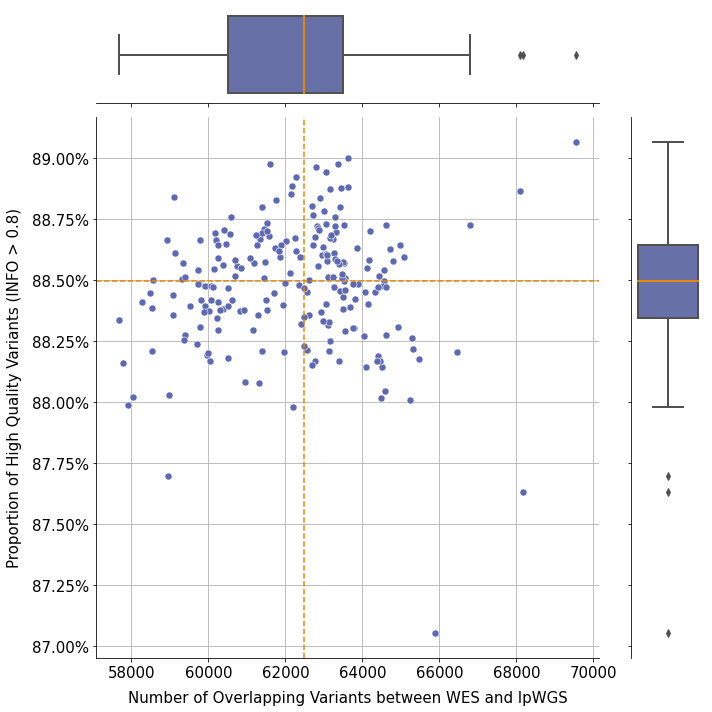

In [64]:
from palettable.cartocolors.qualitative import Vivid_2

import matplotlib.ticker as mtick


dot_color = Vivid_2.mpl_colors[1]
median_color = Vivid_2.mpl_colors[0]

hq_prop_median = combined_dosage_df_filtered_stats.describe()["INFO_mean_helper"]["50%"]*100
overalpping_median = combined_dosage_df_filtered_stats.describe()["ID_count"]["50%"]

g = sns.JointGrid(height=10)
x, y = combined_dosage_df_filtered_stats["ID_count"], combined_dosage_df_filtered_stats["INFO_mean_helper_prop"]

sns.scatterplot(x=x, y=y,s=50, ax=g.ax_joint,color=dot_color)#, ec="b", fc="none", linewidth=1.5,)
# sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
# sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

sns.boxplot(x=x, linewidth=2, ax=g.ax_marg_x, color=dot_color, medianprops={"color": median_color})# boxprops={"facecolor": (0,0,0,0)},)
sns.boxplot(y=y, linewidth=2, ax=g.ax_marg_y, color=dot_color, medianprops={"color": median_color})# boxprops={"facecolor": (0,0,0,0)},)

g.ax_joint.axvline(overalpping_median,linestyle="--",color=median_color)
g.ax_joint.axhline(hq_prop_median,linestyle="--",color=median_color)

g.ax_joint.set_xticklabels(g.ax_joint.get_xticks().astype(int),size=medium_font)
g.ax_joint.set_yticklabels(g.ax_joint.get_yticks(),size=medium_font)

g.ax_joint.set_xlabel("Number of Overlapping Variants between WES and lpWGS",size=medium_font,labelpad=10)
g.ax_joint.set_ylabel("Proportion of High Quality Variants (INFO > 0.8)",size=medium_font,labelpad=10)

g.ax_joint.yaxis.set_major_formatter(mtick.PercentFormatter())

g.ax_joint.set_axisbelow(True)
g.ax_joint.grid(axis="x")
g.ax_joint.grid(axis="y")

g

plt.tight_layout()
plt.savefig("figures/fig_3_lpWGS_wes_variant_stats.png",dpi=300)
plt.savefig("figures/fig_3_lpWGS_wes_variant_stats.eps",dpi=300)




# Figure 3b)

## Examine dosage r2 by MAF bins


In [12]:

freq_bins =[[0,0.0002],[0.0002,0.0005],[0.0005,0.001],[0.001,0.002],[0.002,0.005],[0.005,0.01],
       [0.01,0.02],[0.02,0.05],[0.05,0.1],[0.1,0.15],[0.15,0.2],[0.2,0.25],[0.25,0.3],
       [0.3,0.35],[0.35,0.4],[0.4,0.45],[0.45,0.5]
      ]

freq_bins_small = [0,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
freq_bins_small_with_inverse = [
    0,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,
    0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99,0.995,0.997,0.998,0.999,0.9995,0.9998,1
]

freq_bins_medium = [0,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
freq_bins_medium_extended = [0,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]
freq_bins_medium_extended_with_inverse= [
    0,0.005,0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99,0.995,1
]

info_bins_small = [
    0,0.05,0.1,0.15,0.2,0,25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1
]
info_bins_medium = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

def calc_corr_agg(x):
    d = {}
    temp = np.corrcoef(x['DS_wes'],x['DS_imputed'])**2
    d['dosage_corr_r2'] = temp[0,1]
    return pd.Series(d, index=['dosage_corr_r2'])

def calc_posterior(x):
    d = {"GT_equal_WES_exact":np.mean(x['GT_dosage']==x['DS_wes'])}
    return pd.Series(d, index=['GT_equal_WES_exact'])

def calc_deviation(x):
    raw_deviation = (x['GT_dosage']-x['DS_wes']).to_numpy()
    d = {
#         "dosage_GT_deviation":raw_deviation,
        "dosage_GT_deviation_mean_abs":np.nanmean(np.abs(raw_deviation)),
        "dosage_GT_deviation_var_abs":np.nanvar(np.abs(raw_deviation)),
        "dosage_GT_deviation_mean_squared":np.nanmean(np.power(raw_deviation,2))
    }
    return pd.Series(d, index=['dosage_GT_deviation_mean_abs','dosage_GT_deviation_var_abs','dosage_GT_deviation_mean_squared'])


In [63]:
## Cut info scores into bins of length 0.1
combined_dosage_df_filtered_merged["INFO_bins"] = pd.cut(
    combined_dosage_df_filtered_merged["INFO"],
    bins=info_bins_medium,
    right=True
)

## Calculate dosage correlation per sample in each bin
combined_dosage_df_filtered_merged_agg_info_dosage = combined_dosage_df_filtered_merged.groupby(["sample",'INFO_bins']).apply(calc_corr_agg).reset_index()
combined_dosage_df_filtered_merged_agg_info_dosage.head()



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,sample,INFO_bins,dosage_corr_r2
0,BC_P_001,"(0.0, 0.1]",0.000022
1,BC_P_001,"(0.1, 0.2]",0.544186
2,BC_P_001,"(0.2, 0.3]",0.582476
3,BC_P_001,"(0.3, 0.4]",0.556403
4,BC_P_001,"(0.4, 0.5]",0.584465


## Boxen plot of correpondence between imputation quality score and dosage correlation


In [15]:
info_median_df = combined_dosage_df_filtered_merged_agg_info_dosage.groupby(
    ["INFO_bins"]
).agg({"dosage_corr_r2":"median"}).reset_index()
info_median_df

,INFO_bins,dosage_corr_r2
0,"(0.0, 0.1]",0.000049
1,"(0.1, 0.2]",0.355154
2,"(0.2, 0.3]",0.496535
3,"(0.3, 0.4]",0.521319
4,"(0.4, 0.5]",0.565089
5,"(0.5, 0.6]",0.611291
6,"(0.6, 0.7]",0.679770
7,"(0.7, 0.8]",0.750090
8,"(0.8, 0.9]",0.844067
9,"(0.9, 1.0]",0.954239


In [19]:
stats.pearsonr(x=range(len(info_median_df)),y=info_median_df["dosage_corr_r2"])

PearsonRResult(statistic=0.9442960771290281, pvalue=3.9372303668868095e-05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

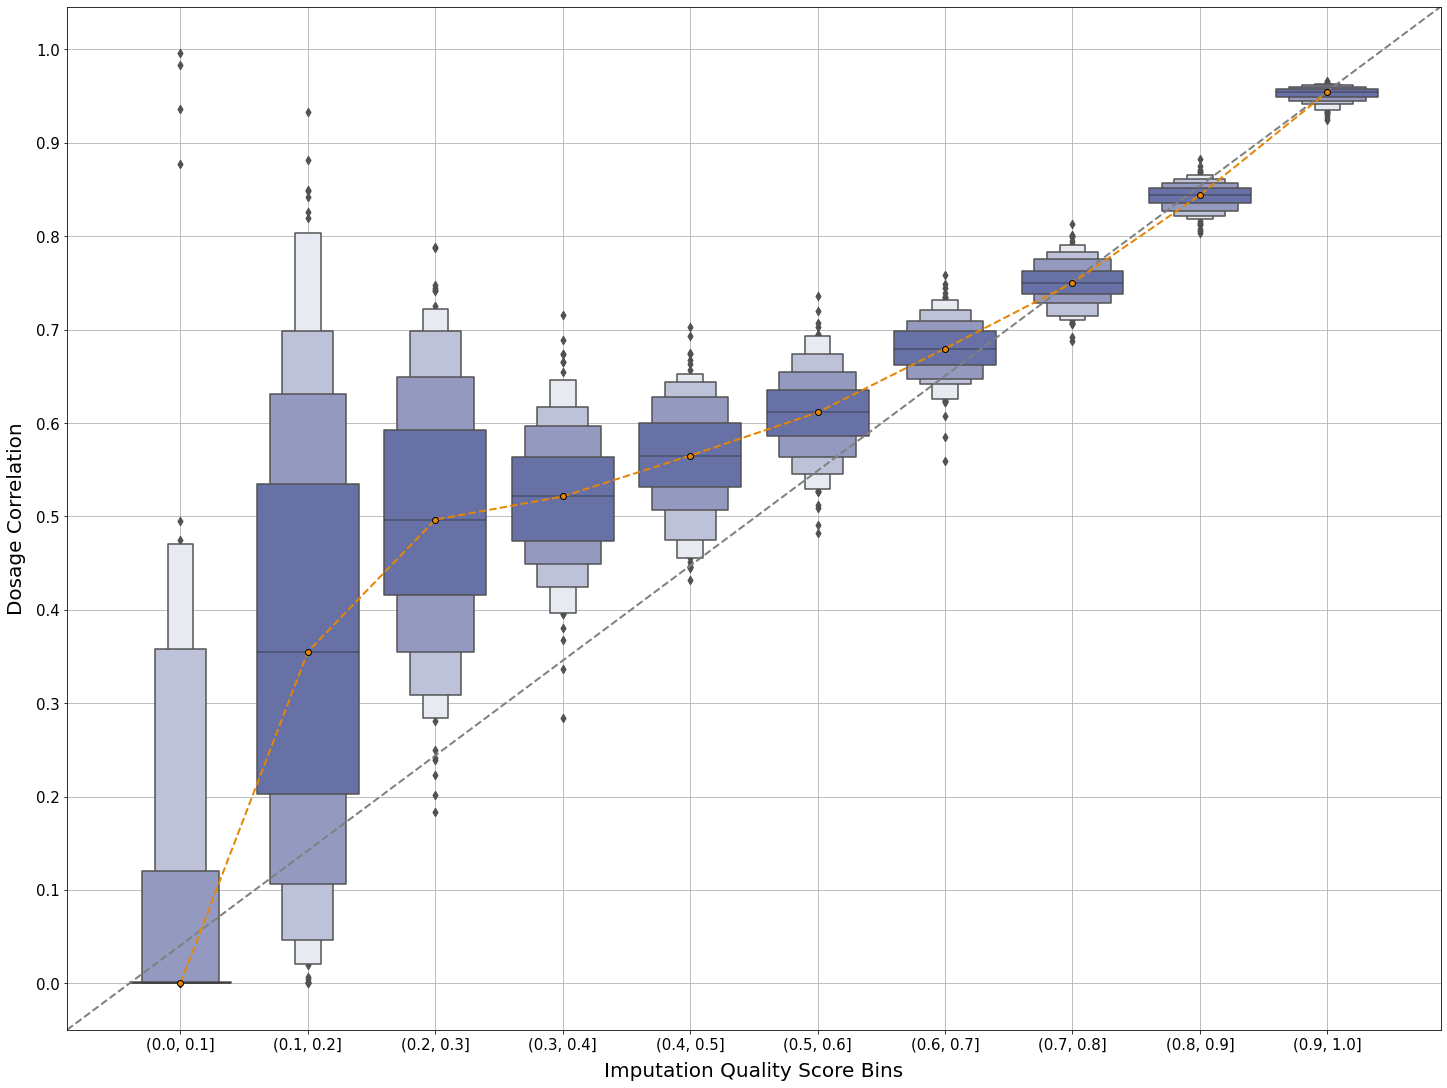

In [65]:
## Boxen plot of correpondence between imputation quality score and dosage correlation

fig,ax = plt.subplots(figsize=(20,15),constrained_layout=True)

sns.boxenplot(
    x="INFO_bins",
    y="dosage_corr_r2",
    color=Vivid_2.mpl_colors[1], 
    scale="linear",
    data=combined_dosage_df_filtered_merged_agg_info_dosage
)

ax.set_axisbelow(True)

ax.set_yticks(np.arange(0,1.1,0.1))

ax.tick_params(axis='both', which='major', labelsize=medium_font)

ax.set_xlabel("Imputation Quality Score Bins",fontsize=large_font,labelpad=10)
ax.set_ylabel("Dosage Correlation",fontsize=large_font,labelpad=10)


ax.plot([0, 1], [0, 1], transform=ax.transAxes,linestyle="--",color="gray",linewidth=2)

ax.plot(
    np.arange(len(info_median_df)),
    info_median_df["dosage_corr_r2"].to_numpy(),
    'o--',
    color=Vivid_2.mpl_colors[0],
    linewidth=2,
    mec="black"
)

ax.grid(axis="y")
ax.grid(axis="x")

plt.savefig("figures/fig_3_lpWGS_quality_score_calibration.png",dpi=300)
plt.savefig("figures/fig_3_lpWGS_quality_score_calibration.eps",dpi=300)



In [179]:
combined_dosage_df_filtered_merged_agg_info_dosage.groupby("INFO_bins").describe()

dosage_corr_r2                                              \
                    count      mean       std           min       25%   
INFO_bins                                                               
(0.0, 0.1]          182.0  0.058573  0.170761  9.951399e-07  0.000025   
(0.1, 0.2]          213.0  0.368827  0.213955  5.228692e-04  0.202904   
(0.2, 0.3]          215.0  0.498502  0.124539  1.834867e-01  0.416019   
(0.3, 0.4]          215.0  0.520443  0.067879  2.837100e-01  0.473809   
(0.4, 0.5]          215.0  0.564495  0.052692  4.318513e-01  0.531981   
(0.5, 0.6]          215.0  0.610497  0.041857  4.825892e-01  0.585879   
(0.6, 0.7]          215.0  0.679442  0.028355  5.587952e-01  0.662272   
(0.7, 0.8]          215.0  0.750843  0.021139  6.880332e-01  0.738551   
(0.8, 0.9]          215.0  0.843097  0.013139  8.035700e-01  0.835477   
(0.9, 1.0]          215.0  0.953043  0.007198  9.242715e-01  0.949246   

                                          
                 50%       75%       max  
INFO_bins                                 
(0.0, 0.1]  0.000049  0.001123  0.996079  
(0.1, 0.2]  0.355154  0.534253  0.933107  
(0.2, 0.3]  0.496535  0.592887  0.788534  
(0.3, 0.4]  0.521319  0.563349  0.716181  
(0.4, 0.5]  0.565089  0.599503  0.702831  
(0.5, 0.6]  0.611291  0.635108  0.735818  
(0.6, 0.7]  0.679770  0.698782  0.758865  
(0.7, 0.8]  0.750090  0.763203  0.812884  
(0.8, 0.9]  0.844067  0.851525  0.882907  
(0.9, 1.0]  0.954239  0.957983  0.966372

# Figure 3c)

## Boxen plot of before after filtering the correlation of each MAF bin


In [24]:
combined_dosage_df_filtered_merged["DS_wes_cohort_MAF_bins"] = pd.cut(
    combined_dosage_df_filtered_merged["DS_wes_cohort_MAF"],
    bins=freq_bins_medium,
    right=True
)

combined_dosage_df_pre_filtered_agg_maf = combined_dosage_df_filtered_merged.groupby(["sample",'DS_wes_cohort_MAF_bins']).apply(calc_corr_agg).reset_index()
combined_dosage_df_post_filtered_agg_maf = combined_dosage_df_filtered_merged[
    combined_dosage_df_filtered_merged["INFO"] > 0.8
].groupby(["sample",'DS_wes_cohort_MAF_bins']).apply(calc_corr_agg).reset_index()




In [25]:
combined_dosage_df_pre_filtered_agg_maf["filter_status"] = "Pre-filtered"
combined_dosage_df_post_filtered_agg_maf["filter_status"] = "Post-filtered"
combined_dosage_df_agg_maf_concat = pd.concat([combined_dosage_df_pre_filtered_agg_maf,combined_dosage_df_post_filtered_agg_maf])
combined_dosage_df_agg_maf_concat



,sample,DS_wes_cohort_MAF_bins,dosage_corr_r2,filter_status
0,BC_P_001,"(0.0, 0.005]",0.730797,Pre-filtered
1,BC_P_001,"(0.005, 0.01]",0.612123,Pre-filtered
2,BC_P_001,"(0.01, 0.02]",0.713101,Pre-filtered
3,BC_P_001,"(0.02, 0.05]",0.713035,Pre-filtered
4,BC_P_001,"(0.05, 0.1]",0.792492,Pre-filtered
...,...,...,...,...
2790,BC_P_240,"(0.25, 0.3]",0.934267,Post-filtered
2791,BC_P_240,"(0.3, 0.35]",0.924549,Post-filtered
2792,BC_P_240,"(0.35, 0.4]",0.916996,Post-filtered
2793,BC_P_240,"(0.4, 0.45]",0.904068,Post-filtered


In [26]:
overall_post_filtered_df = combined_dosage_df_filtered_merged[
    combined_dosage_df_filtered_merged["INFO"]>0.8
].groupby(["sample"]).apply(calc_corr_agg).reset_index()
overall_post_filtered_df

,sample,dosage_corr_r2
0,BC_P_001,0.950547
1,BC_P_002,0.935731
2,BC_P_003,0.947817
3,BC_P_004,0.957364
4,BC_P_005,0.949292
...,...,...
210,BC_P_236,0.935690
211,BC_P_237,0.934926
212,BC_P_238,0.929060
213,BC_P_239,0.916327


In [27]:
overall_post_filtered_df["dosage_corr_r2"].describe()

count    215.000000
mean       0.944468
std        0.007107
min        0.916327
25%        0.941015
50%        0.945907
75%        0.949006
max        0.960068
Name: dosage_corr_r2, dtype: float64

In [28]:
maf_median_df = combined_dosage_df_agg_maf_concat.groupby(
    ["filter_status","DS_wes_cohort_MAF_bins"]
).agg({"dosage_corr_r2":"median"}).reset_index()

maf_median_df_pivot = maf_median_df.pivot("DS_wes_cohort_MAF_bins","filter_status","dosage_corr_r2")
maf_median_df_pivot.head()


filter_status,Post-filtered,Pre-filtered
DS_wes_cohort_MAF_bins,,
"(0.0, 0.005]",0.940586,0.674343
"(0.005, 0.01]",0.937112,0.665907
"(0.01, 0.02]",0.939810,0.710239
"(0.02, 0.05]",0.938608,0.758176
"(0.05, 0.1]",0.943596,0.791080


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

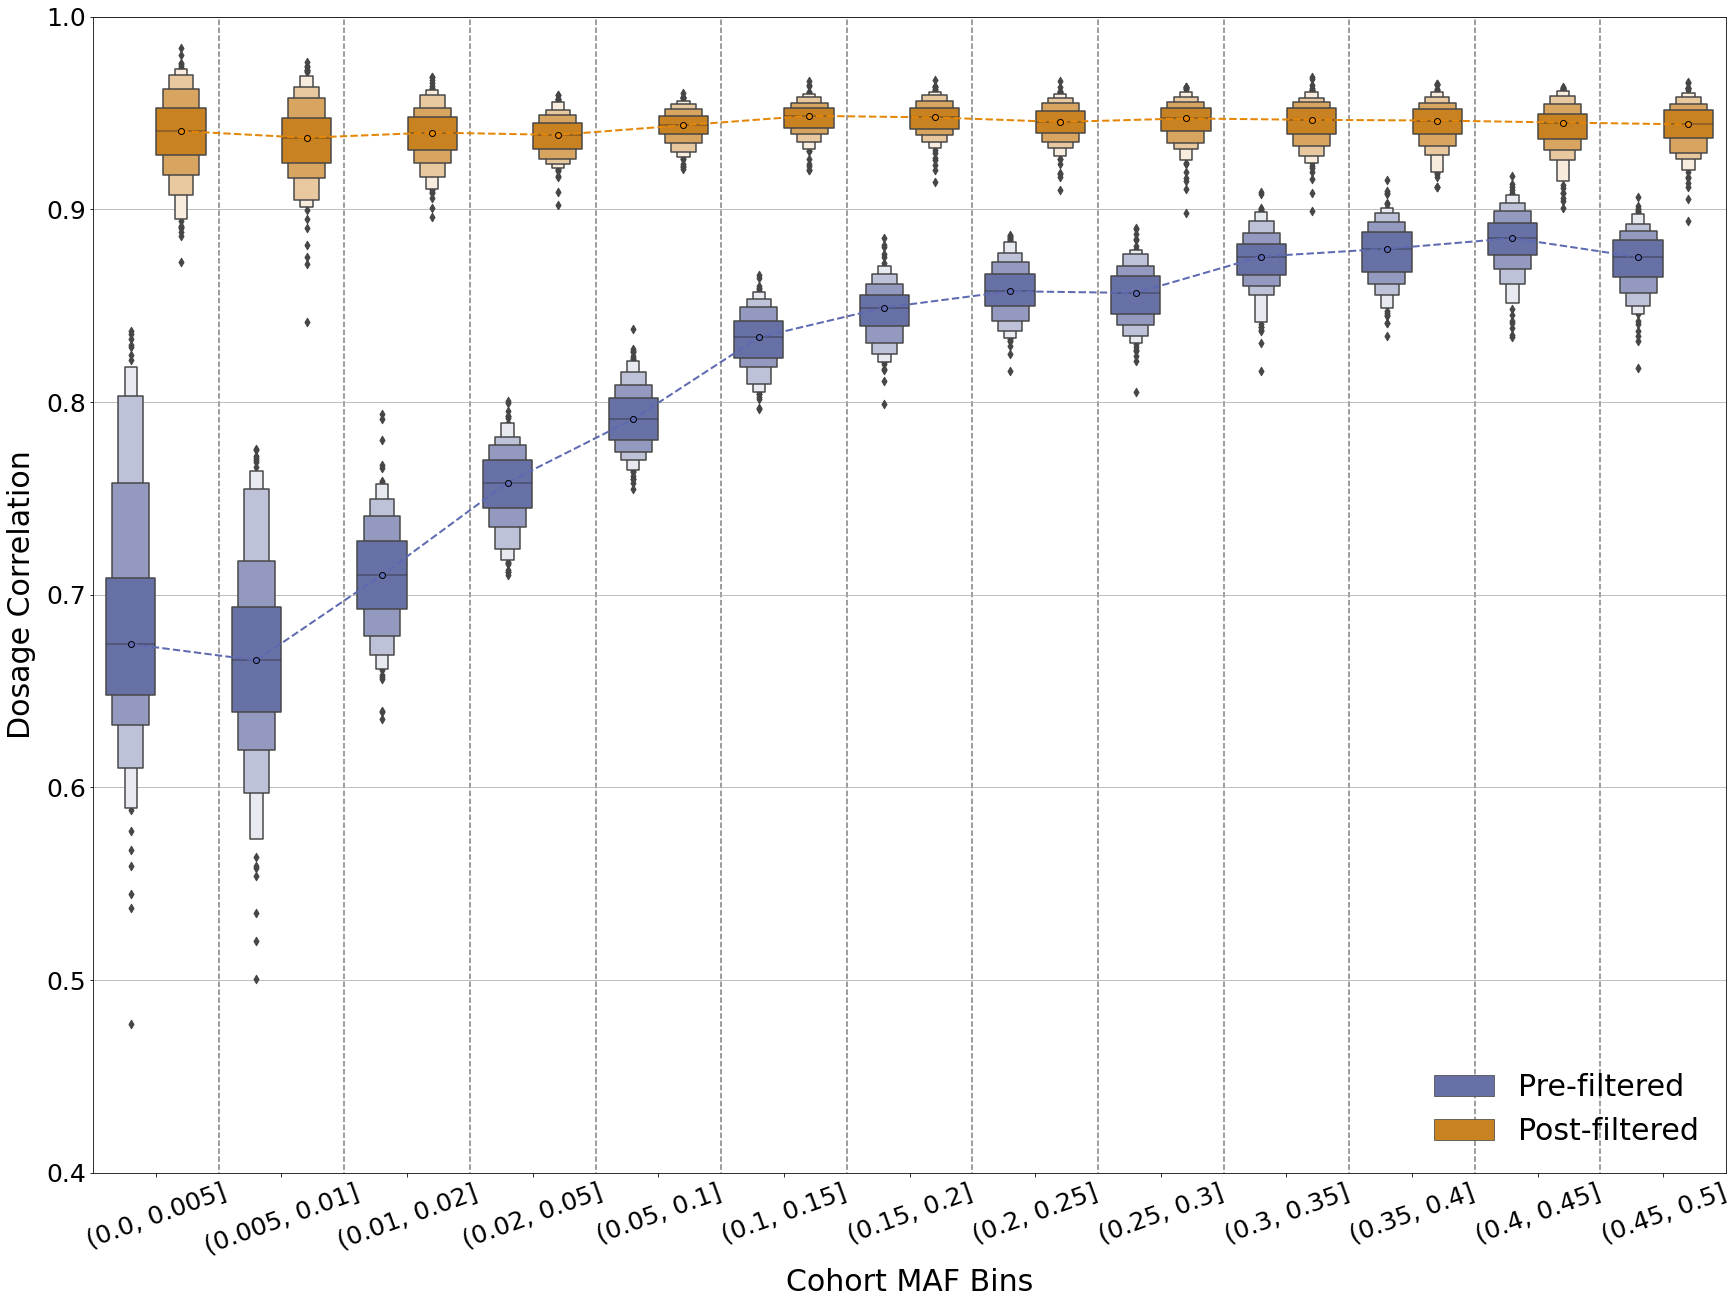

In [67]:
fig,ax = plt.subplots(figsize=(24,18),constrained_layout=True)

sns.boxenplot(
    x="DS_wes_cohort_MAF_bins",
    y="dosage_corr_r2",
    hue="filter_status",
    scale="linear",
    data=combined_dosage_df_agg_maf_concat,
    palette={
        "Pre-filtered":Vivid_2.mpl_colors[1],
        "Post-filtered":Vivid_2.mpl_colors[0]
    }
)

for i in range(0,combined_dosage_df_agg_maf_concat["DS_wes_cohort_MAF_bins"].nunique()):
    if i != combined_dosage_df_agg_maf_concat["DS_wes_cohort_MAF_bins"].nunique() -1:
        ax.plot([i+0.5,i+0.5],[0,1],linestyle="--",color="gray",zorder=-1)

ax.set_ylim(0.4,1)
ax.set_xlim(-0.5,combined_dosage_df_agg_maf_concat["DS_wes_cohort_MAF_bins"].nunique()-0.5)

ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=large_font+5)
ax.tick_params(axis='x', rotation=20)

ax.set_xlabel("Cohort MAF Bins",fontsize=large_font+10,labelpad=10)
ax.set_ylabel("Dosage Correlation",fontsize=large_font+10,labelpad=10)

sns.move_legend(ax,loc="lower right",frameon=False,fontsize=large_font+10,title=None)

ax.plot(
    np.arange(len(maf_median_df_pivot))+0.2,
    maf_median_df_pivot["Post-filtered"].to_numpy(),
    'o--',
    color=Vivid_2.mpl_colors[0],
    linewidth=2,
    mec="black"
)

ax.plot(
    np.arange(len(maf_median_df_pivot))-0.2,
    maf_median_df_pivot["Pre-filtered"].to_numpy(),
    'o--',
    color=Vivid_2.mpl_colors[1],
    linewidth=2,
    mec="black"
)

ax.grid(axis="y")

plt.savefig("figures/fig_3_lpWGS_post_filtered_by_MAF.png",dpi=300)
plt.savefig("figures/fig_3_lpWGS_post_filtered_by_MAF.eps",dpi=300)




# Figure 3d)

## Ancestry-correlation of imputed variants


In [30]:
combined_dosage_df_info_filtered = combined_dosage_df_filtered_merged[
    combined_dosage_df_filtered_merged["INFO"] > 0.8
]
combined_dosage_df_info_filtered.head()

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage,...,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,INFO_bins,DS_wes_cohort_MAF_bins
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2,...,0.9819,1,0.9994,0.999,0.9747,0.9988,0.9651,0.9969,"(0.9, 1.0]","(0.05, 0.1]"
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2,...,0.5823,0.6756,0.5106,0.6446,0.7057,0.7091,0.5943,0.6398,"(0.8, 0.9]","(0.45, 0.5]"
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2,...,0.9299,0.9277,0.9248,0.9666,0.9304,0.9461,0.925,0.9204,"(0.8, 0.9]","(0.05, 0.1]"
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2,...,0.913,0.9116,0.9261,0.9422,0.9114,0.933,0.902,0.9047,"(0.8, 0.9]","(0.4, 0.45]"
5,chr1_944296_G_A,2,2.000,0.915052,0.885783,0.084948,0.934,1/1,BC_P_143,2,...,0.9161,0.9271,0.9196,0.9666,0.9272,0.9448,0.9077,0.9215,"(0.9, 1.0]","(0.05, 0.1]"


In [31]:
combined_dosage_var_info_df = combined_dosage_df_info_filtered.drop_duplicates(subset="ID")
combined_dosage_var_info_df

,ID,DS_wes,DS_imputed,AF,RAF,MAF,INFO,GT,sample,GT_dosage,...,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,INFO_bins,DS_wes_cohort_MAF_bins
0,chr1_930939_G_A,2,2.000,0.950548,0.953674,0.049452,0.936,1/1,BC_P_143,2,...,0.9819,1,0.9994,0.999,0.9747,0.9988,0.9651,0.9969,"(0.9, 1.0]","(0.05, 0.1]"
1,chr1_935954_G_T,2,1.995,0.540554,0.496805,0.459446,0.894,1/1,BC_P_143,2,...,0.5823,0.6756,0.5106,0.6446,0.7057,0.7091,0.5943,0.6398,"(0.8, 0.9]","(0.45, 0.5]"
2,chr1_941119_A_G,2,2.000,0.925323,0.913139,0.074677,0.888,1/1,BC_P_143,2,...,0.9299,0.9277,0.9248,0.9666,0.9304,0.9461,0.925,0.9204,"(0.8, 0.9]","(0.05, 0.1]"
3,chr1_942335_C_G,1,2.000,0.890966,0.884385,0.109034,0.898,1/1,BC_P_143,2,...,0.913,0.9116,0.9261,0.9422,0.9114,0.933,0.902,0.9047,"(0.8, 0.9]","(0.4, 0.45]"
5,chr1_944296_G_A,2,2.000,0.915052,0.885783,0.084948,0.934,1/1,BC_P_143,2,...,0.9161,0.9271,0.9196,0.9666,0.9272,0.9448,0.9077,0.9215,"(0.9, 1.0]","(0.05, 0.1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370308,chr21_29092557_G_A,1,1.000,0.002110,0.002196,0.002110,0.987,0/1,BC_P_004,1,...,0.0008513,0,0,0,0,4.409e-05,0.000956,0,"(0.9, 1.0]","(0.0, 0.005]"
13370335,chr21_30496950_T_C,1,0.997,0.004163,0.002596,0.004163,0.998,0/1,BC_P_004,1,...,0.0009373,0,0.0001949,0,0,2.951e-05,0.001957,0,"(0.9, 1.0]","(0.0, 0.005]"
13370560,chr21_39452045_C_T,1,1.000,0.004225,0.005791,0.004225,0.986,0/1,BC_P_004,1,...,0.001768,0,0,0,0,0.0001323,0.005263,0.000207,"(0.9, 1.0]","(0.0, 0.005]"
13370674,chr21_42350292_C_T,1,1.000,0.002210,0.008387,0.002210,0.944,0/1,BC_P_004,1,...,0.01703,0.01992,0.0003877,0.01166,0.01266,0.02758,0.02413,0.00794,"(0.9, 1.0]","(0.0, 0.005]"


In [32]:
from scipy import stats

combined_dosage_var_info_df_no_na = combined_dosage_var_info_df.replace({"-":0})

population_cols = ["AFR","AMI","AMR","ASJ","EAS","FIN","MID","NFE","SAS"]#,"OTH",
population_col_names = [f"gnomADg_{pop}_AF" for pop in population_cols]
population_col_names += ["DS_wes_cohort_AF"]

corr_rows = []

for pop1 in population_col_names:
    for pop2 in population_col_names:
        print(f"pop1: {pop1}, pop2: {pop2}")
        r,p = stats.pearsonr(
            combined_dosage_var_info_df_no_na[pop1].astype(float).to_numpy(),
            combined_dosage_var_info_df_no_na[pop2].astype(float).to_numpy()
        )
        corr_rows.append([pop1,pop2,r,p])

corr_df = pd.DataFrame(columns=["Pop_1","Pop_2","pearson_r","pearson_p"],data=corr_rows)

corr_df_af = corr_df[(corr_df["Pop_1"]=="DS_wes_cohort_AF")&(corr_df["Pop_2"]!="DS_wes_cohort_AF")]
corr_df_af = corr_df_af.rename(columns={"Pop_2":"gnomAD Population Code","DS_wes_cohort_AF":"Correlation"})
corr_df_af["gnomAD Population Code"] = [name.split("_")[1] for name in corr_df_af["gnomAD Population Code"]]

corr_df_af = corr_df_af.sort_values(by="pearson_r",ascending=False)
corr_df_af


pop1: gnomADg_AFR_AF, pop2: gnomADg_AFR_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_AMI_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_AMR_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_ASJ_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_EAS_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_FIN_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_MID_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_NFE_AF
pop1: gnomADg_AFR_AF, pop2: gnomADg_SAS_AF
pop1: gnomADg_AFR_AF, pop2: DS_wes_cohort_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_AFR_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_AMI_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_AMR_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_ASJ_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_EAS_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_FIN_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_MID_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_NFE_AF
pop1: gnomADg_AMI_AF, pop2: gnomADg_SAS_AF
pop1: gnomADg_AMI_AF, pop2: DS_wes_cohort_AF
pop1: gnomADg_AMR_AF, pop2: gnomADg_AFR_AF
pop1: gnomADg_AMR_AF, pop2: gnomADg_AMI_AF
pop1: gnomADg_AMR_AF, pop2: gnomADg_AMR_AF
pop1: g

,Pop_1,gnomAD Population Code,pearson_r,pearson_p
96,DS_wes_cohort_AF,MID,0.944132,0.0
93,DS_wes_cohort_AF,ASJ,0.935968,0.0
92,DS_wes_cohort_AF,AMR,0.930527,0.0
97,DS_wes_cohort_AF,NFE,0.929690,0.0
98,DS_wes_cohort_AF,SAS,0.926670,0.0
95,DS_wes_cohort_AF,FIN,0.919865,0.0
91,DS_wes_cohort_AF,AMI,0.911311,0.0
90,DS_wes_cohort_AF,AFR,0.877682,0.0
94,DS_wes_cohort_AF,EAS,0.853359,0.0


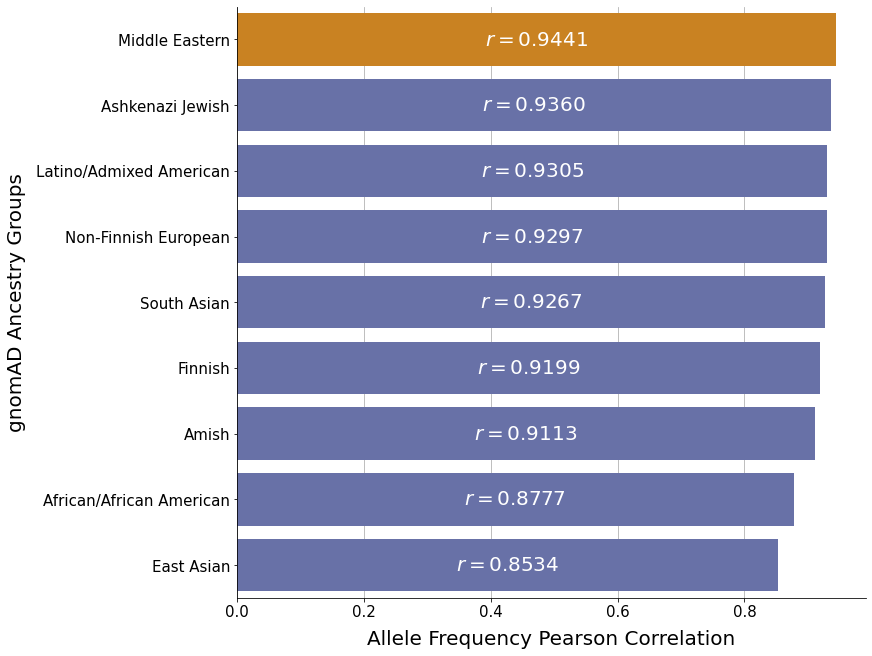

In [68]:
corr_df_af = corr_df_af.replace({
    "MID": "Middle Eastern",
    "OTH": "Others",
    "ASJ": "Ashkenazi Jewish",
    "AMR": "Latino/Admixed American",
    "SAS": "South Asian",
    "NFE": "Non-Finnish European",
    "AMI": "Amish",
    "FIN": "Finnish",
    "AFR": "African/African American",
    "EAS": "East Asian",
})

## Remove the "OTHER" population to avoid confusion

corr_df_af = corr_df_af[corr_df_af["gnomAD Population Code"]!="Others"].copy()
corr_df_af

fig,ax = plt.subplots(figsize=(12,9),constrained_layout=True)

plot_palette = {code:Vivid_2.mpl_colors[1] for code in corr_df_af["gnomAD Population Code"]}
plot_palette["Middle Eastern"] = Vivid_2.mpl_colors[0]

sns.barplot(data=corr_df_af, y="gnomAD Population Code",x="pearson_r",ax=ax,palette=plot_palette)
ax.bar_label(ax.containers[-1], fmt=r'$r=$%.4f', label_type='center',color="white",fontsize=large_font)

ax.set_xlabel(r"Allele Frequency Pearson Correlation",fontsize=large_font,labelpad=10)
ax.set_ylabel(r"gnomAD Ancestry Groups",fontsize=large_font,labelpad=10)


ax.tick_params(axis='both', which='major', labelsize=medium_font)

ax.set_axisbelow(True)
ax.grid(axis="x")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig("figures/fig_3_imputed_variants_AF_correlation.png",dpi=300)
plt.savefig("figures/fig_3_imputed_variants_AF_correlation.eps",dpi=300)


# Supplementary Tables

## S2: Imputation Performance by INFO

In [34]:
info_bin_supp_df = combined_dosage_df_filtered_merged_agg_info_dosage.groupby("INFO_bins").describe().copy()
info_bin_supp_df.columns = [f"dosage_correlation_{col[1]}" for col in info_bin_supp_df.columns]
info_bin_supp_df = info_bin_supp_df.reset_index()
info_bin_size_df = combined_dosage_df_filtered_merged.groupby("INFO_bins").size().to_frame()
info_bin_size_df.columns = ["variant_evaluated"]
info_bin_size_df = info_bin_size_df.reset_index()
info_bin_supp_df_merged = info_bin_size_df.merge(info_bin_supp_df,on="INFO_bins")
info_column_name_updates = {
    "INFO_bins": "Imputation Quality Score Bins",
    "dosage_correlation_count":"number_of_samples_evaluated"
}
info_bin_supp_df_merged = info_bin_supp_df_merged.rename(columns=info_column_name_updates)
info_bin_supp_df_merged

,Imputation Quality Score Bins,variant_evaluated,number_of_samples_evaluated,dosage_correlation_mean,dosage_correlation_std,dosage_correlation_min,dosage_correlation_25%,dosage_correlation_50%,dosage_correlation_75%,dosage_correlation_max
0,"(0.0, 0.1]",83762,182.0,0.058573,0.170761,9.951399e-07,0.000025,0.000049,0.001123,0.996079
1,"(0.1, 0.2]",25089,213.0,0.368827,0.213955,5.228692e-04,0.202904,0.355154,0.534253,0.933107
2,"(0.2, 0.3]",21109,215.0,0.498502,0.124539,1.834867e-01,0.416019,0.496535,0.592887,0.788534
3,"(0.3, 0.4]",33568,215.0,0.520443,0.067879,2.837100e-01,0.473809,0.521319,0.563349,0.716181
4,"(0.4, 0.5]",68026,215.0,0.564495,0.052692,4.318513e-01,0.531981,0.565089,0.599503,0.702831
5,"(0.5, 0.6]",118680,215.0,0.610497,0.041857,4.825892e-01,0.585879,0.611291,0.635108,0.735818
6,"(0.6, 0.7]",200170,215.0,0.679442,0.028355,5.587952e-01,0.662272,0.679770,0.698782,0.758865
7,"(0.7, 0.8]",376761,215.0,0.750843,0.021139,6.880332e-01,0.738551,0.750090,0.763203,0.812884
8,"(0.8, 0.9]",863447,215.0,0.843097,0.013139,8.035700e-01,0.835477,0.844067,0.851525,0.882907
9,"(0.9, 1.0]",10968597,215.0,0.953043,0.007198,9.242715e-01,0.949246,0.954239,0.957983,0.966372


In [35]:
info_bin_supp_df_merged.to_csv(
    "data/supplementary_tables/S2_Imputation_Performance_By_Info_Bins.tsv",
    sep="\t",
    index=False
)



## S3: Imputation Performance by MAF before and after filtering

In [36]:
maf_supp_df = combined_dosage_df_agg_maf_concat.groupby(["filter_status","DS_wes_cohort_MAF_bins"]).describe()
maf_supp_df.columns = [f"dosage_correlation_{col[1]}" for col in maf_supp_df.columns]
maf_supp_df = maf_supp_df.reset_index()
maf_column_name_updates = {
    "filter_status": "Filter Status",
    "DS_wes_cohort_MAF_bins": "Cohort Minor Allele Frequency Bins",
    "dosage_correlation_count":"number_of_samples_evaluated"
}
maf_supp_df = maf_supp_df.rename(columns=maf_column_name_updates)
maf_supp_df

,Filter Status,Cohort Minor Allele Frequency Bins,number_of_samples_evaluated,dosage_correlation_mean,dosage_correlation_std,dosage_correlation_min,dosage_correlation_25%,dosage_correlation_50%,dosage_correlation_75%,dosage_correlation_max
0,Post-filtered,"(0.0, 0.005]",215.0,0.939414,0.020087,0.872526,0.928281,0.940586,0.952439,0.983499
1,Post-filtered,"(0.005, 0.01]",215.0,0.935838,0.019657,0.841309,0.923968,0.937112,0.947364,0.976517
2,Post-filtered,"(0.01, 0.02]",215.0,0.938695,0.013299,0.896026,0.930568,0.939810,0.947892,0.968845
3,Post-filtered,"(0.02, 0.05]",215.0,0.937809,0.009705,0.902251,0.931115,0.938608,0.944852,0.959346
4,Post-filtered,"(0.05, 0.1]",215.0,0.943142,0.007750,0.920951,0.938952,0.943596,0.948268,0.960151
5,Post-filtered,"(0.1, 0.15]",215.0,0.947255,0.007881,0.920236,0.942325,0.948504,0.952629,0.966721
6,Post-filtered,"(0.15, 0.2]",215.0,0.947121,0.008409,0.914387,0.941707,0.947668,0.952658,0.967078
7,Post-filtered,"(0.2, 0.25]",215.0,0.944900,0.009007,0.910029,0.939339,0.945314,0.951146,0.966466
8,Post-filtered,"(0.25, 0.3]",215.0,0.945668,0.010078,0.898280,0.940642,0.947154,0.952813,0.963662
9,Post-filtered,"(0.3, 0.35]",215.0,0.945044,0.010379,0.899246,0.939237,0.946416,0.952345,0.968843


In [37]:
maf_supp_df.to_csv(
    "./data/supplementary_tables/S3_Imputation_Performance_By_MAF_Bins.tsv",
    sep="\t",
    index=False
)

